<a href="https://colab.research.google.com/github/yamidevs/simple-autoencodeur/blob/main/Auto_encodeur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!git init

Initialized empty Git repository in /content/.git/


In [54]:
!git add -A

In [59]:
!git config --global user.name "Yamo"
!git config --global user.email "yamisaaf@live.fr"

In [60]:
!git commit -m “autoencodeur”

[master (root-commit) d0c3e39] “autoencodeur”
 20 files changed, 50715 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/.metricsUUID
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/gce
 create mode 100644 .config/logs/2020.12.02/22.03.37.873126.log
 create mode 100644 .config/logs/2020.12.02/22.03.59.234441.log
 create mode 100644 .config/logs/2020.12.02/22.04.13.854338.log
 create mode 100644 .config/logs/2020.12.02/22.04.21.823807.log
 create mode 100644 .config/logs/2020.12.02/22.04.37.441505.log
 create mode 100644 .config/logs/2020.12.02/22.04.38.150307.log
 create mode 100755 sample_data/README.md
 create mode 100755 sample_data/anscombe.json
 create mode 100644 sample_data/california_housing_test.csv
 create 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class AE(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.encoder_hidden_layer = nn.Linear(
            in_features=kwargs["input_shape"], out_features=128
        )
        self.encoder_output_layer = nn.Linear(
            in_features=128, out_features=128
        )
        self.decoder_hidden_layer = nn.Linear(
            in_features=128, out_features=128
        )
        self.decoder_output_layer = nn.Linear(
            in_features=128, out_features=kwargs["input_shape"]
        )

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = torch.relu(activation)
        code = self.encoder_output_layer(activation)
        code = torch.relu(code)
        activation = self.decoder_hidden_layer(code)
        activation = torch.relu(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.relu(activation)
        return reconstructed

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AE(input_shape = 784).to(device)
optimizer = optim.Adam(model.parameters(),lr = 1e-3)
criteron = nn.MSELoss()

In [ ]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=True, transform=transform, download=True
)

test_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=False, transform=transform, download=True
)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=10, shuffle=False, num_workers=4
)

In [ ]:
epochs = 100
for epoch in range(epochs):
  loss = 0
  for batch_features,_ in train_loader:
      batch_features = batch_features.view(-1,784).to(device)
      optimizer.zero_grad()
      outputs = model(batch_features)
      train_loss = criteron(outputs,batch_features)
      train_loss.backward()
      optimizer.step()
      loss += train_loss.item()
  loss = loss / len(train_loader)
  print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))

epoch : 1/100, loss = 0.014507
epoch : 2/100, loss = 0.014248
epoch : 3/100, loss = 0.014019
epoch : 4/100, loss = 0.013840
epoch : 5/100, loss = 0.013698
epoch : 6/100, loss = 0.013575
epoch : 7/100, loss = 0.013461
epoch : 8/100, loss = 0.013350
epoch : 9/100, loss = 0.013260
epoch : 10/100, loss = 0.013174
epoch : 11/100, loss = 0.013103
epoch : 12/100, loss = 0.013036
epoch : 13/100, loss = 0.012972
epoch : 14/100, loss = 0.012911
epoch : 15/100, loss = 0.012859
epoch : 16/100, loss = 0.012810
epoch : 17/100, loss = 0.012762
epoch : 18/100, loss = 0.012718
epoch : 19/100, loss = 0.012674
epoch : 20/100, loss = 0.012635
epoch : 21/100, loss = 0.012595
epoch : 22/100, loss = 0.012559
epoch : 23/100, loss = 0.012528
epoch : 24/100, loss = 0.012491
epoch : 25/100, loss = 0.012459
epoch : 26/100, loss = 0.012426
epoch : 27/100, loss = 0.012409
epoch : 28/100, loss = 0.012383
epoch : 29/100, loss = 0.012352
epoch : 30/100, loss = 0.012341
epoch : 31/100, loss = 0.012320
epoch : 32/100, l

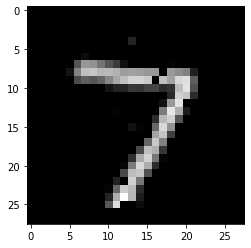

In [ ]:
for batch,_ in test_loader:
    entry = batch[0].view(-1,784).to(device)
    reconstruct = model(entry)
    plt.imshow(reconstruct.detach().cpu().numpy().reshape(28,28))

    plt.gray()
    break